#Importing Libraries:

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy import stats
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler

#Improting Dataset:

In [32]:
file=pd.read_csv("students_data.csv")
file.head()
file.drop(columns=['Unnamed: 3'], inplace=True)
first_row=file[:0:3]
first_row_list=list(first_row)

#Finding Shape (m*n):

In [33]:
file.shape

(599, 3)

#Checking Nan Values:

In [34]:
file.isnull().sum()

Oliver Thompson       300
Harvard University    300
2                     311
dtype: int64

Giving Names to Columns:

In [35]:
columns_name = ['Student_Name', 'University_Name', 'Student_CGPA']
new_column_names = {}
for i, col in enumerate(file.columns):
    new_column_names[col] = columns_name[i]
file.rename(columns=new_column_names, inplace=True)
file = file.append(pd.Series(first_row_list, index=file.columns), ignore_index=True)
file

<ipython-input-35-9331c10b9164>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  file = file.append(pd.Series(first_row_list, index=file.columns), ignore_index=True)


,Student_Name,University_Name,Student_CGPA
0,Emma Johnson,Stanford University,3.82
1,Liam Smith,Massachusetts Institute of Technology (MIT),3.6
2,Olivia Brown,University of Cambridge,2.93
3,Noah Davis,University of Oxford,3.3
4,Ava Wilson,California Institute of Technology (Caltech),2.95
...,...,...,...
595,NaN,NaN,NaN
596,NaN,NaN,NaN
597,NaN,NaN,NaN
598,NaN,NaN,NaN


#Dropping "Useless" Column Because It have all rows=Nan:

In [36]:
file.columns

Index(['Student_Name', 'University_Name', 'Student_CGPA'], dtype='object')

#Now Converting "Student_CGPA" column data type into 'float64":

In [37]:
file.Student_CGPA=pd.to_numeric(file.Student_CGPA,errors='coerce')
file.dtypes

Student_Name        object
University_Name     object
Student_CGPA       float64
dtype: object

Drooping Nan Values:

In [38]:
file=file.dropna()

Removing Duplicate rows:

In [39]:
file=file.drop_duplicates()

In [40]:
file.head()

,Student_Name,University_Name,Student_CGPA
0,Emma Johnson,Stanford University,3.82
1,Liam Smith,Massachusetts Institute of Technology (MIT),3.60
2,Olivia Brown,University of Cambridge,2.93
3,Noah Davis,University of Oxford,3.30
4,Ava Wilson,California Institute of Technology (Caltech),2.95


#What are the top 5 universities with the highest average CGPA?

In [41]:
top_5_universities=file.groupby('University_Name')['Student_CGPA'].mean().nlargest(5)
print(top_5_universities)

University_Name
University of Southampton                  4.626667
University of Toronto                      3.525000
University of Southern California (USC)    3.455000
University of Bristol                      3.440000
University of Michigan, Ann Arbor          3.433333
Name: Student_CGPA, dtype: float64


#Visualization OF top 5 Universities with highest average CGPA:

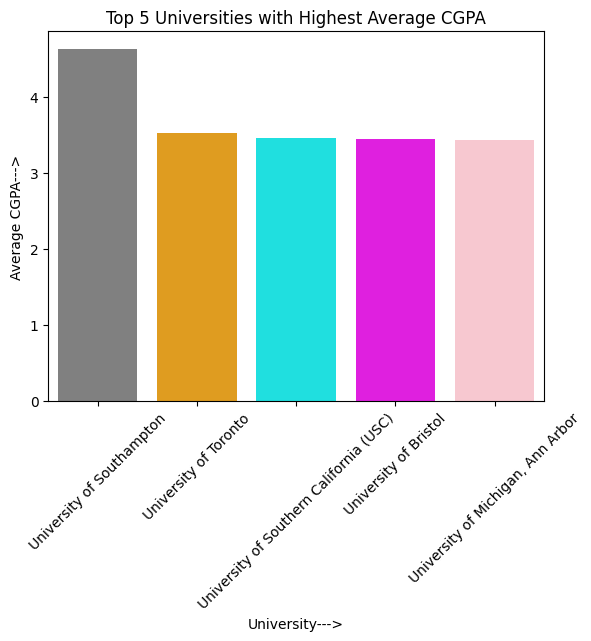

In [42]:
colors = ["grey", "orange", "cyan", "magenta", "pink"]
sbs.barplot(x=top_5_universities.index, y=top_5_universities.values, palette=colors)
plt.xlabel('University--->')
plt.ylabel('Average CGPA--->')
plt.title('Top 5 Universities with Highest Average CGPA')
plt.xticks(rotation=45)
plt.show()

#Is there a correlation between the CGPA and the length of the student's name?

In [43]:
file['Name_Length'] = file['Student_Name'].str.len()
correlation = file[['Student_CGPA', 'Name_Length']].corr()
print("Correlation coefficient=",correlation)

Correlation coefficient=               Student_CGPA  Name_Length
Student_CGPA       1.00000      0.05133
Name_Length        0.05133      1.00000


Visualization between CGPA and length of Student Name ⁉

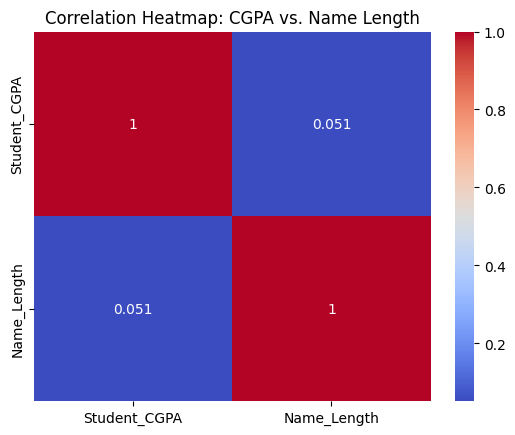

In [44]:
sbs.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: CGPA vs. Name Length')
plt.show()
#too low correlation.

#How does the CGPA vary across different universities?

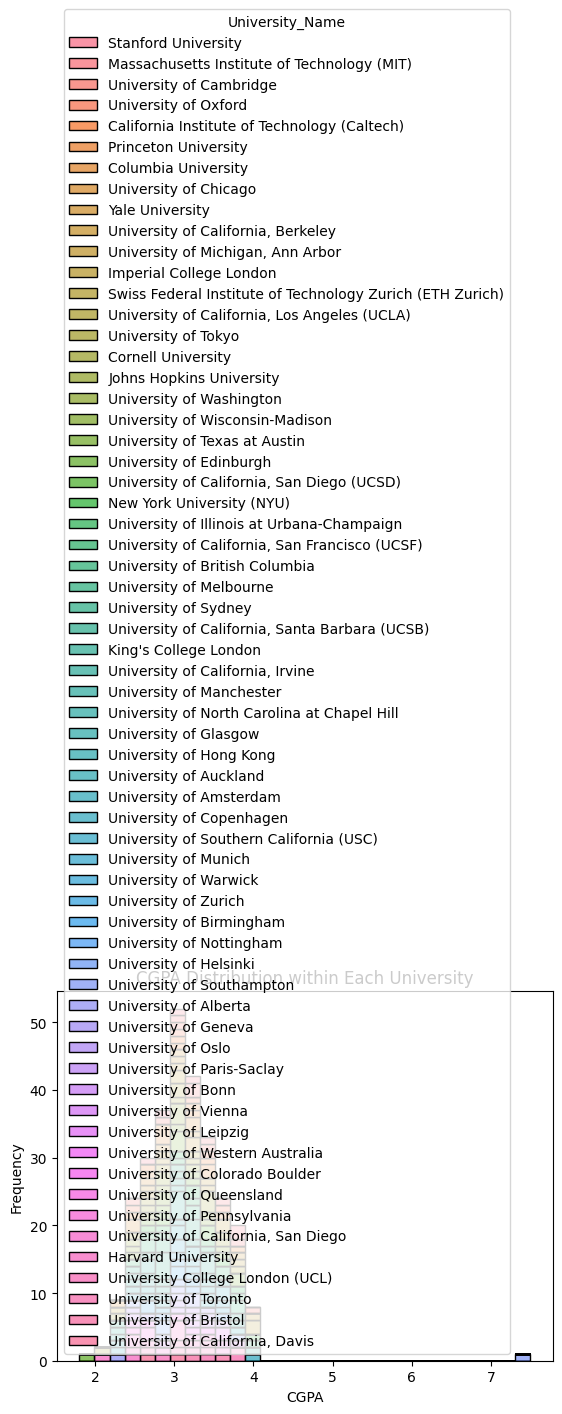

In [45]:
sbs.histplot(data=file, x='Student_CGPA', hue='University_Name', multiple='stack')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('CGPA Distribution within Each University')
plt.show()

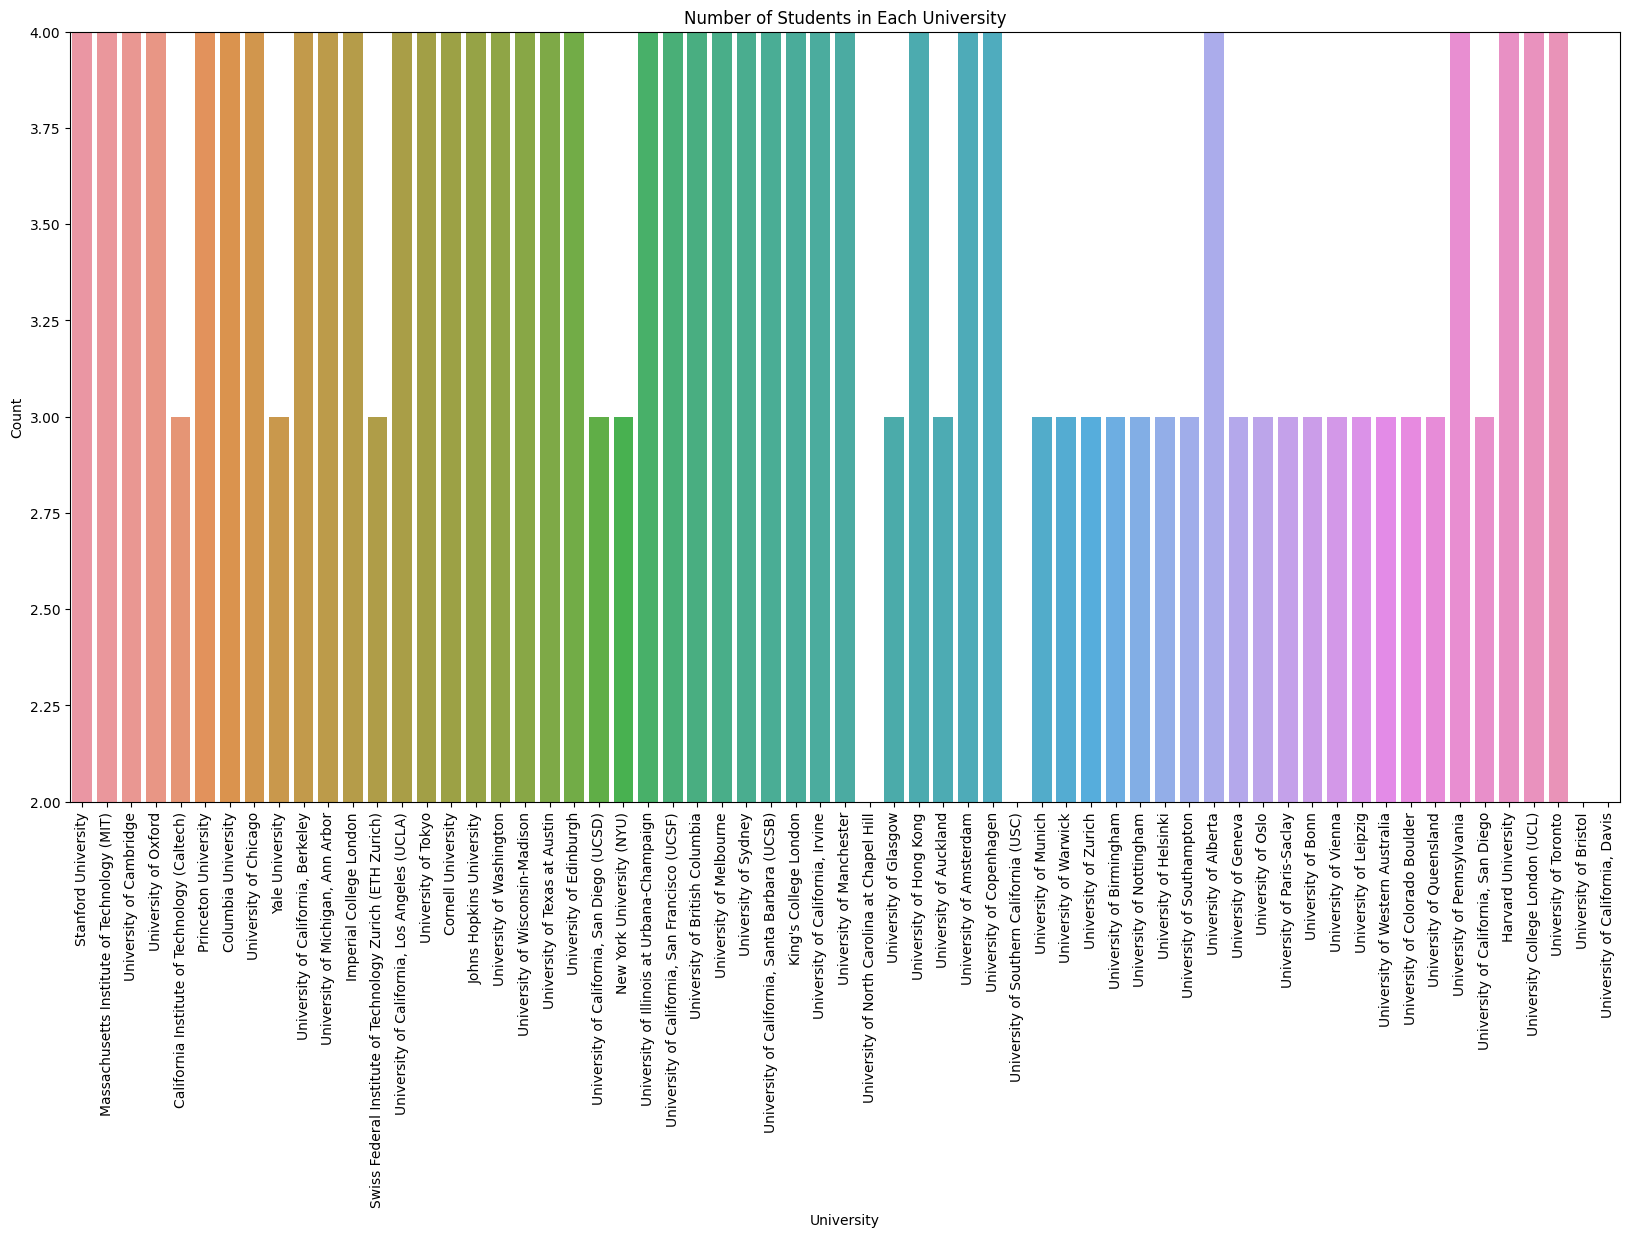

In [46]:
fig , ax = plt.subplots(figsize = (20,10))
sbs.countplot(data=file, x='University_Name',ax=ax)
plt.xlabel('University')
plt.ylabel('Count')
plt.title('Number of Students in Each University')
plt.xticks(rotation=90)
plt.ylim(2.0,4.0)
plt.show()

#Can we predict a student's CGPA based on the length of their name using linear regression?

The correlation 0.05:

it indicates a very weak positive correlation.A correlation value of 0.06 suggests that there is a very minimum linear relationship between the CGPA and the name length.

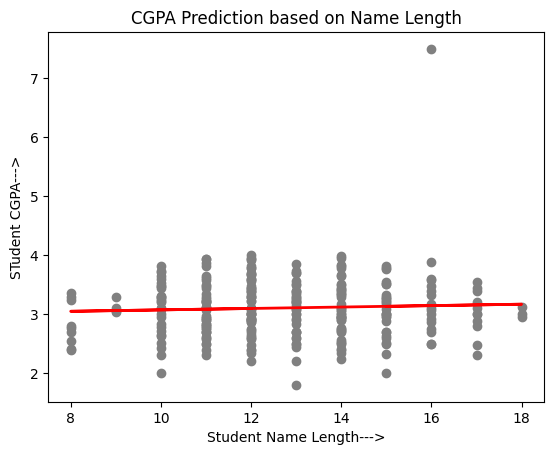

Mean Squared Error: 0.2582738201179288


In [47]:
X = file['Name_Length'].values.reshape(-1, 1)
y = file['Student_CGPA'].values
model = LinearRegression()
model.fit(X, y)
predicted_cgpa = model.predict(X)
plt.scatter(X, y, color='grey', label='Actual Data')
plt.plot(X, predicted_cgpa, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Student Name Length--->')
plt.ylabel('STudent CGPA--->')
plt.title('CGPA Prediction based on Name Length')
plt.show()
mse = mean_squared_error(y, predicted_cgpa)
print("Mean Squared Error:",mse)

#Which university has the highest number of students with a CGPA above a certain threshold?

In [48]:
threshold = 3.00
filtered_data = file[file.Student_CGPA > threshold]
university_counts = filtered_data.groupby('University_Name').size()
university_with_highest_count = university_counts.idxmax()
print("The university with the highest number of students above the CGPA 3.0 threshold =",university_with_highest_count)

The university with the highest number of students above the CGPA 3.0 threshold = King's College London


#Can we identify any outliers in the CGPA distribution within each university?

Text(0.5, 1.0, 'CGPA Distribution within Each University')

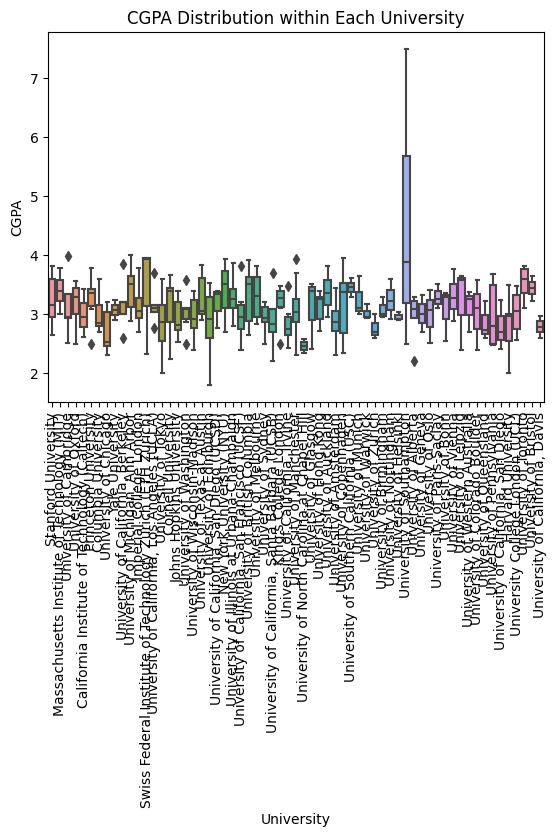

In [49]:
sbs.boxplot(x='University_Name', y='Student_CGPA', data=file)
plt.xticks(rotation=90)
plt.xlabel('University')
plt.ylabel('CGPA')
plt.title('CGPA Distribution within Each University')

In [50]:
def remove_outliers(data, threshold=3):
    z_scores = stats.zscore(data)  # Calculate z-scores
    filtered_data = data[abs(z_scores) <= threshold]  # Filter data based on threshold
    cleaned_data = data[data.isin(filtered_data).all(axis=1)]  # Remove rows containing outliers
    return cleaned_data
cleaned_data = remove_outliers(file[['Student_CGPA']])

#Can we cluster students based on their CGPA using k-means clustering?

k-Mean clustering after removing outliers from Student_CGPA:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


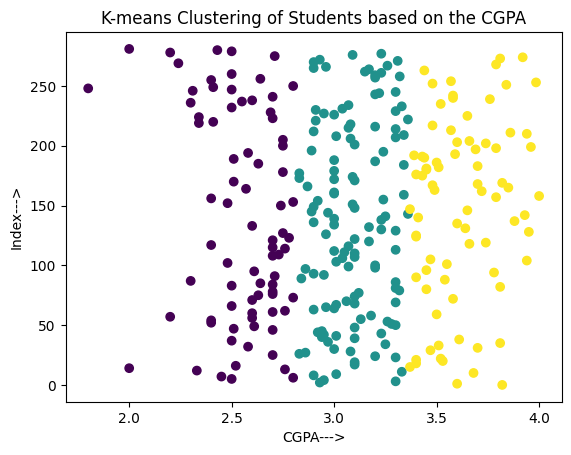

In [51]:
from sklearn.preprocessing import LabelEncoder

# Encode student names as numeric labels
label_encoder = LabelEncoder()
encoded_names = label_encoder.fit_transform(file['Student_Name'])
X = cleaned_data.values.reshape(-1, 1)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
plt.scatter(X, range(len(cleaned_data.values)), c=labels, cmap='viridis')
plt.xlabel('CGPA--->')
plt.ylabel('Index--->')
plt.title('K-means Clustering of Students based on the CGPA')
plt.show()

k_mean clustering when we have outliers in student CGPA:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


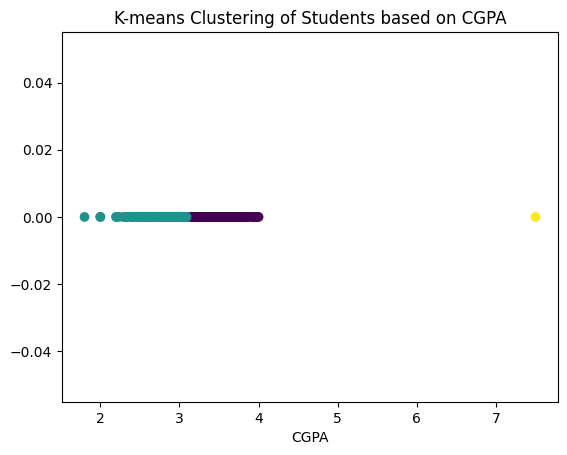

In [52]:
X = file.Student_CGPA.values.reshape(-1, 1)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
plt.scatter(file['Student_CGPA'], [0]* len(file), c=labels, cmap='viridis')
plt.xlabel('CGPA')
plt.title('K-means Clustering of Students based on CGPA')
plt.show()

#What is the average CGPA for each cluster identified in the previous question?

Here we Have 3 clusters and 3 different averages to thier respective clusters:

In [53]:
cleaned_data['Cluster'] = labels[:len(cleaned_data)]
avg_cgpa_by_cluster = cleaned_data.groupby('Cluster')['Student_CGPA'].mean()
print(avg_cgpa_by_cluster)

Cluster
0    3.176575
1    3.020117
2    2.940000
Name: Student_CGPA, dtype: float64


#Can we classify students into universities based on their CGPA using a decision tree?

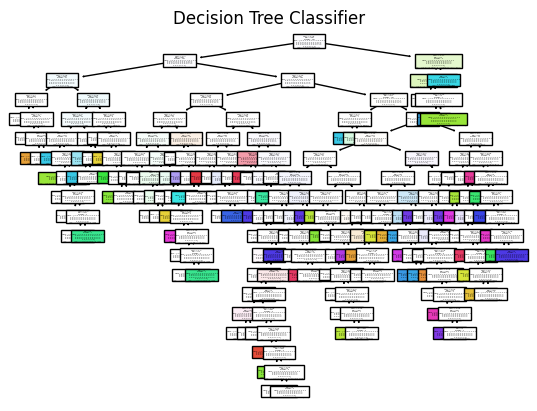

In [54]:
X = file[['Student_CGPA']]
y = file[['University_Name']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
D_T_C_Object = DecisionTreeClassifier()
D_T_C_Object.fit(X_train, y_train)
y_pred = D_T_C_Object.predict(X_test)
plot_tree(D_T_C_Object, feature_names=['CGPA'], class_names=D_T_C_Object.classes_, filled=True)
plt.title('Decision Tree Classifier')
plt.show()

#How accurate is the decision tree model in predicting the university?

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:" ,accuracy)

Accuracy: 0.0


#What is the overall average CGPA across all universities?

In [56]:
print("Overall Average CGPA Acroos All Universities",cleaned_data.Student_CGPA.mean())

Overall Average CGPA Acroos All Universities 3.0902943262411346


#Can we build a regression model to predict a student's CGPA based on their university?

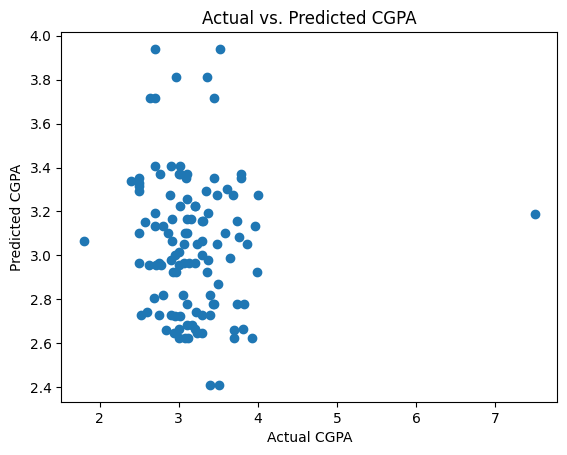

In [57]:
X = file[['University_Name']]
y = file['Student_CGPA']
X_encoded = pd.get_dummies(X, drop_first=True)#actually I have used y=file.University_Name from previous cell.See Decision Tree Regression Cell.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.40, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs. Predicted CGPA')
plt.show()

How well does the regression model perform in predicting the CGPA?

In [60]:
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:(MSE)=", mse)
R_Squared=r2_score(y_test, y_pred)
print("R_Squared=",R_Squared)
#Lower MSE indicates better model performance.
#The model is not good in explaining the variation of student CGPA.

Mean Squared Error:(MSE)= 0.2582738201179288
R_Squared= -0.4110867213854772


Linear Regression Model:

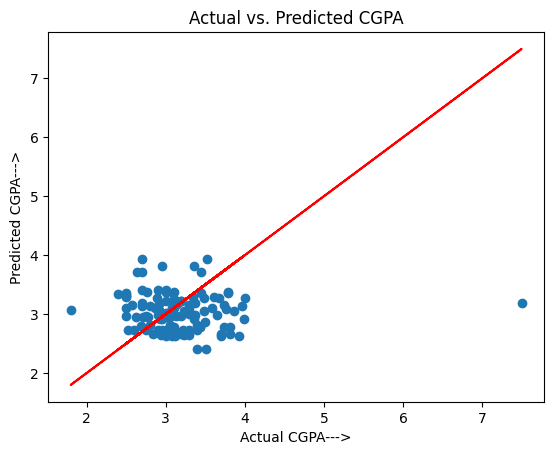

In [61]:
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_test, color='red')
plt.xlabel('Actual CGPA--->')
plt.ylabel('Predicted CGPA--->')
plt.title('Actual vs. Predicted CGPA')
plt.show()

#Are there any missing or erroneous values in the CGPA column?

Answer:

Yes, there were many missing values (NaN), but I have already cleared them by dropping the NaN values and removing duplicate values as well.

#Can we detect any relationships between the length of the student's name and their university using association rules?

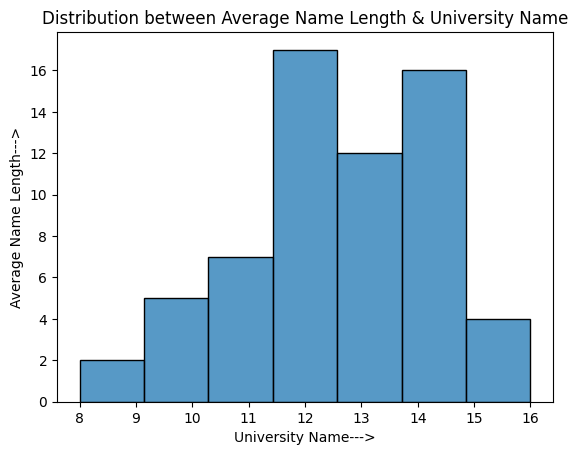

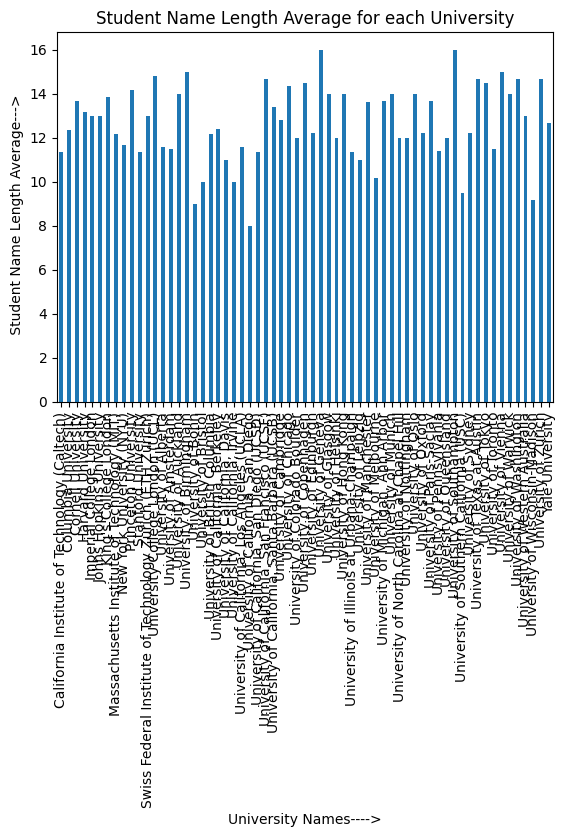

In [133]:
name_length_avg = file.groupby('University_Name')['Name_Length'].mean()
sbs.histplot(name_length_avg)
plt.xlabel('University Name--->')
plt.ylabel('Average Name Length--->')
plt.title('Distribution between Average Name Length & University Name')
plt.show()
name_length_avg.plot(kind='bar')
plt.xlabel('University Names---->')
plt.ylabel(' Student Name Length Average--->')
plt.title('Student Name Length Average for each University')
plt.show()

#What is the range of CGPA scores for each university?

In [67]:
cgpa_range = file.groupby('University_Name')['Student_CGPA'].agg(['min', 'max'])
print("Range of CGPA for each University:\n",cgpa_range.head())

Range of CGPA for each University:
                                                min   max
University_Name                                         
California Institute of Technology (Caltech)  2.61  3.43
Columbia University                           2.70  3.59
Cornell University                            2.24  3.66
Harvard University                            2.00  3.50
Imperial College London                       2.70  3.79


#Can we identify any clusters or groups of students based on the CGPA and university using hierarchical clustering?

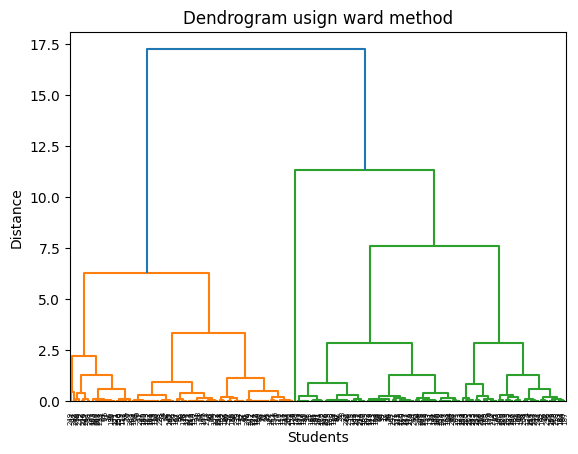

In [101]:
features = ['Student_CGPA']
scaler = StandardScaler()
file_scaled = scaler.fit_transform(file[features])
clustering = AgglomerativeClustering(n_clusters=3)  # Specify the number of clusters
labels = clustering.fit_predict(file_scaled)
linkage_matrix = linkage(file_scaled, method='ward')  # Use 'ward' method for hierarchical clustering
dendrogram(linkage_matrix)
plt.title('Dendrogram usign ward method')
plt.xlabel('Students')
plt.ylabel('Distance')
plt.show()

#Can we build a classification model to predict the university based on the CGPA and the length of the student's name?

In [125]:
X_train, X_test, y_train, y_test = train_test_split(file[['Student_CGPA', 'Name_Length']], file.University_Name, test_size=0.20, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#How accurate is the classification model in predicting the university?

In [126]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#The model is not performing well bcz accuracy=1.7%(very low)

Accuracy: 0.017543859649122806


#What is the correlation between the length of the student's name and the CGPA within each university?

In [127]:
correlation=file.Name_Length.corr(file.Student_CGPA)
print(correlation)

0.051329688243614446
